In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [169]:
import pandas as pd


file_path = '/content/drive/MyDrive/429140.txt'

# reading the file with different encodings
encodings_ikea = ['utf-8', 'latin1', 'iso-8859-1', 'cp1252']

for encoding in encodings_ikea:
    try:
        data_ikea = pd.read_csv(file_path, sep='\t', encoding=encoding)
        print(f"File read successfully with encoding: {encoding}")
        break
    except UnicodeDecodeError:
        print(f"Failed to read file with encoding: {encoding}")

data_ikea.head()


Failed to read file with encoding: utf-8
File read successfully with encoding: latin1


,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border
0,2583,2010,Haparanda,1078,276,10059,719,0.071478,195.74174,111.075774,0,1
1,880,2010,Kalmar,3790,1621,62815,8716,0.138757,117.17365,390.516869,0,0
2,1780,2010,Karlstad,4560,1910,85753,13308,0.155190,119.64794,469.856708,0,0
3,114,2010,Upplands Väsby,1366,708,39289,4419,0.112474,96.69215,140.750935,0,0
4,115,2010,Vallentuna,171,99,30114,3843,0.127615,86.56347,17.619627,0,0


In [170]:
data_ikea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Kommun_code            207 non-null    int64  
 1   Year                   207 non-null    int64  
 2   Kommun_name            207 non-null    object 
 3   Revenue                207 non-null    int64  
 4   Employee               207 non-null    int64  
 5   Population             207 non-null    int64  
 6   Population_University  207 non-null    int64  
 7   Percent_University     207 non-null    float64
 8   Productivity           207 non-null    float64
 9   SalesIndex             207 non-null    float64
 10  Infrast                207 non-null    int64  
 11  Border                 207 non-null    int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 19.5+ KB


In [171]:
data_ikea.describe()

,Kommun_code,Year,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border
count,207.000000,207.0,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,1049.734300,2010.0,1031.801932,523.038647,34543.396135,4660.106280,0.097461,91.454002,106.315583,0.048309,0.038647
std,541.065455,0.0,2694.889549,1463.194427,66882.499740,14403.495784,0.040760,27.960867,277.678055,0.214939,0.193220
min,114.000000,2010.0,11.000000,2.000000,3672.000000,174.000000,0.046142,19.898880,1.133426,0.000000,0.000000
25%,582.500000,2010.0,110.000000,64.500000,10785.500000,788.500000,0.069015,74.700910,11.334263,0.000000,0.000000
50%,1263.000000,2010.0,252.000000,142.000000,16515.000000,1598.000000,0.086601,90.457050,25.965765,0.000000,0.000000
75%,1461.500000,2010.0,825.500000,435.000000,37922.000000,4073.500000,0.112085,104.008805,85.058489,0.000000,0.000000
max,2583.000000,2010.0,32897.000000,18795.000000,847073.000000,191585.000000,0.269646,275.636330,3389.665819,1.000000,1.000000


In [172]:
Ikea_data = data_ikea.drop(["Kommun_name", "Year", "Kommun_code"],  axis=1)

In [173]:
Ikea_data.head()

,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border
0,1078,276,10059,719,0.071478,195.74174,111.075774,0,1
1,3790,1621,62815,8716,0.138757,117.17365,390.516869,0,0
2,4560,1910,85753,13308,0.155190,119.64794,469.856708,0,0
3,1366,708,39289,4419,0.112474,96.69215,140.750935,0,0
4,171,99,30114,3843,0.127615,86.56347,17.619627,0,0


In [174]:
#scaling the dataset using standard scaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler


scaler = StandardScaler()
scaled_data = scaler.fit_transform(Ikea_data)

scaled_data[1:6]


array([[ 1.02597326,  0.75220563,  0.42373029,  0.28227357,  1.01559689,
         0.92207436,  1.02597326, -0.22530295, -0.20050188],
       [ 1.31239193,  0.9501975 ,  0.76752138,  0.60185794,  1.41974542,
         1.01078006,  1.31239193, -0.22530295, -0.20050188],
       [ 0.12431242,  0.12671573,  0.07112635, -0.01678001,  0.36922347,
         0.18779268,  0.12431242, -0.22530295, -0.20050188],
       [-0.32019447, -0.29050591, -0.06638708, -0.05686725,  0.7415873 ,
        -0.17533034, -0.32019447, -0.22530295, -0.20050188],
       [-0.17438133, -0.14321091,  0.07460353,  0.02442076,  0.72137869,
        -0.05724979, -0.17438133, -0.22530295, -0.20050188]])

In [175]:
# Apply PCA
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.95)
pca_ikea_data = pca.fit_transform(scaled_data)

In [176]:
print("Explained variance ratio of each principal component:")
print(pca.explained_variance_ratio_)

# Print the number of components selected
print("\nNumber of principal components selected to retain 95% variance:")
print(pca.n_components_)


# Print the shape of the PCA-transformed data
print("\nShape of the PCA-transformed data:")
print(pca_ikea_data.shape)

Explained variance ratio of each principal component:
[0.59422767 0.12892354 0.10237335 0.09350743 0.07300327]

Number of principal components selected to retain 95% variance:
5

Shape of the PCA-transformed data:
(207, 5)


In [177]:
pca_ikea_data

array([[-0.44213657,  6.22005276, -0.0468619 , -0.48632822,  0.64842766],
       [ 1.74872404,  0.38275978, -1.05693289,  0.39770379,  0.10346562],
       [ 2.45794831,  0.38720789, -1.30315164,  0.35491766,  0.2438901 ],
       ...,
       [ 3.71028818,  0.11339125, -0.93733458, -0.18934761, -0.31111736],
       [-0.75878476, -0.40575082,  0.21241634, -0.20978892, -0.32909114],
       [-0.85387706,  0.08416435,  0.06415947,  0.26883873, -0.48116306]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

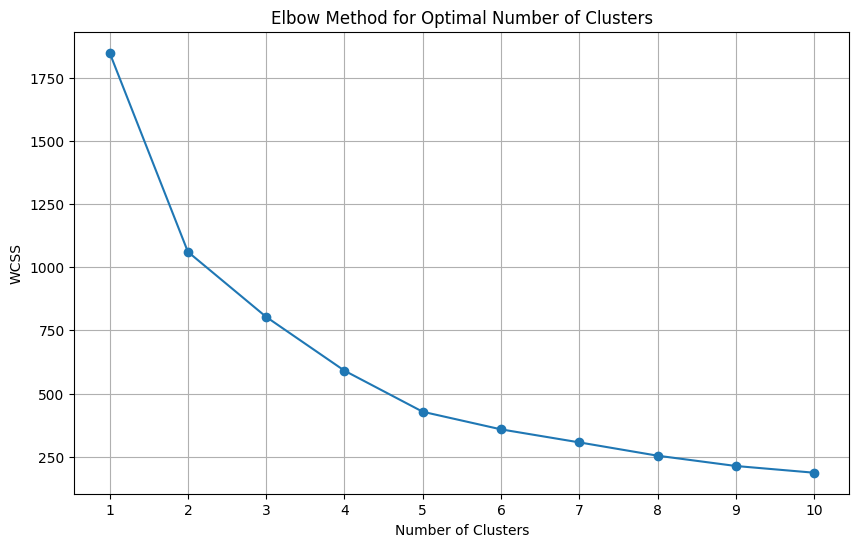

In [178]:
wcss = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, init='k-means++', random_state=7)
    kmeans.fit(pca_ikea_data)
    wcss.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()



In [179]:
# K-means clustering

optimum_clusters = 3

kmeans = KMeans(n_clusters=optimum_clusters, init='k-means++', random_state=42)

clusters = kmeans.fit_predict(pca_ikea_data)

clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int32)

In [180]:
#append the cluster labels to the appropriate column
data_ikea['cluster_labels'] = clusters


In [181]:
data_ikea.head()

,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,cluster_labels
0,2583,2010,Haparanda,1078,276,10059,719,0.071478,195.74174,111.075774,0,1,0
1,880,2010,Kalmar,3790,1621,62815,8716,0.138757,117.17365,390.516869,0,0,1
2,1780,2010,Karlstad,4560,1910,85753,13308,0.155190,119.64794,469.856708,0,0,1
3,114,2010,Upplands Väsby,1366,708,39289,4419,0.112474,96.69215,140.750935,0,0,0
4,115,2010,Vallentuna,171,99,30114,3843,0.127615,86.56347,17.619627,0,0,0


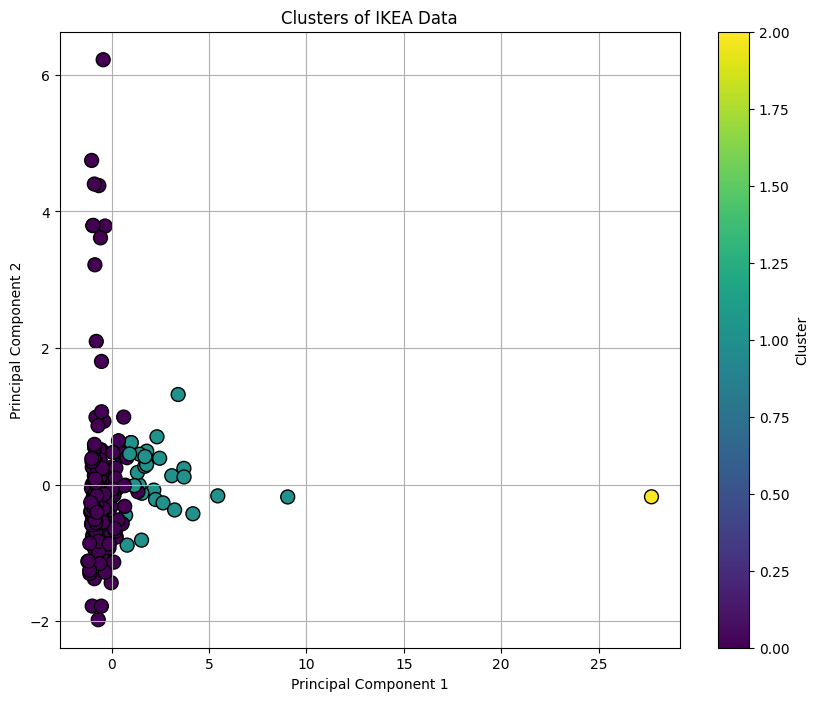

In [182]:
# Plot the clusters
plt.figure(figsize=(10, 8))
plt.scatter(pca_ikea_data[:, 0], pca_ikea_data[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=100)
plt.title('Clusters of IKEA Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [183]:
# List of places where IKEA exists
ikea_locations_kommun = ["Borlänge", "Gävle", "Göteborg", "Haparanda", "Helsingborg", "Jönköping", "Kalmar", "Karlstad",
                  "Linköping", "Malmö", "Stockholm", "Sundsvall", "Uddevalla", "Umeå", "Uppsala", "Västerås",
                  "Älmhult", "Örebro"]


# Adding a new column 'has_IKEA' to the dataframe
data_ikea['has_IKEA'] = data_ikea['Kommun_name'].apply(lambda x: 1 if x in ikea_locations_kommun else 0)

data_ikea.head()

,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,cluster_labels,has_IKEA
0,2583,2010,Haparanda,1078,276,10059,719,0.071478,195.74174,111.075774,0,1,0,1
1,880,2010,Kalmar,3790,1621,62815,8716,0.138757,117.17365,390.516869,0,0,1,1
2,1780,2010,Karlstad,4560,1910,85753,13308,0.155190,119.64794,469.856708,0,0,1,1
3,114,2010,Upplands Väsby,1366,708,39289,4419,0.112474,96.69215,140.750935,0,0,0,0
4,115,2010,Vallentuna,171,99,30114,3843,0.127615,86.56347,17.619627,0,0,0,0


In [184]:
#remove rows where has_Ikea == 1

data_new = data_ikea[data_ikea['has_IKEA'] == 0]

data_new.head()

,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,cluster_labels,has_IKEA
3,114,2010,Upplands Väsby,1366,708,39289,4419,0.112474,96.69215,140.750935,0,0,0,0
4,115,2010,Vallentuna,171,99,30114,3843,0.127615,86.56347,17.619627,0,0,0,0
5,117,2010,Österåker,563,314,39521,5011,0.126793,89.85712,58.010817,0,0,0,0
6,120,2010,Värmdö,920,454,38301,4720,0.123234,101.55604,94.795652,0,0,0,0
7,123,2010,Järfälla,5119,2001,66211,9009,0.136065,128.20702,527.455371,0,0,1,0


In [185]:
import numpy as np
import seaborn as sns
# Selecting only numeric columns for analysis
numeric_columns = data_new.select_dtypes(include=np.number).columns

# Group by cluster labels and calculate mean values for numeric columns

cluster_analysis_Ikea_data = data_new.groupby('cluster_labels')[numeric_columns].mean()
print(cluster_analysis_Ikea_data)



                Kommun_code    Year      Revenue     Employee    Population  \
cluster_labels                                                                
0               1080.247126  2010.0   366.132184   202.465517  19788.896552   
1                741.714286  2010.0  3034.952381  1350.904762  76136.142857   

                Population_University  Percent_University  Productivity  \
cluster_labels                                                            
0                         1885.356322            0.086750     87.920662   
1                        11703.809524            0.158512    111.195884   

                SalesIndex  Infrast   Border  cluster_labels  has_IKEA  
cluster_labels                                                          
0                37.725803  0.04023  0.04023             0.0       0.0  
1               312.717705  0.00000  0.00000             1.0       0.0  


Text(0, 0.5, 'average population')

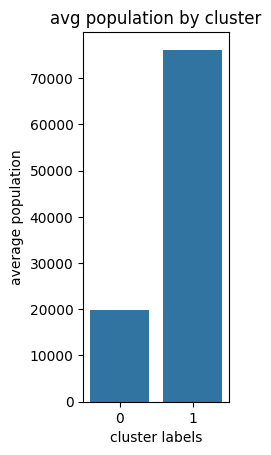

In [186]:
#creating bar plot for average of  population , revenue and sales index

# average population
plt.subplot(1,3,2)
sns.barplot(x=cluster_analysis_Ikea_data.index, y = cluster_analysis_Ikea_data["Population"])
plt.title("avg population by cluster")
plt.xlabel("cluster labels")
plt.ylabel("average population")

Text(0, 0.5, 'average revenue')

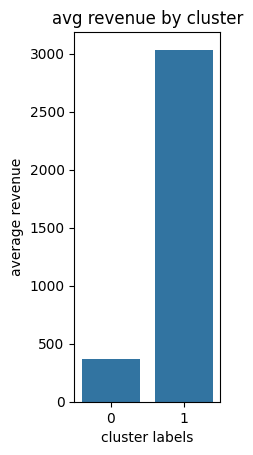

In [187]:
# average population
plt.subplot(1,3,2)
sns.barplot(x=cluster_analysis_Ikea_data.index, y = cluster_analysis_Ikea_data["Revenue"])
plt.title("avg revenue by cluster")
plt.xlabel("cluster labels")
plt.ylabel("average revenue")

Text(0, 0.5, 'average SalesIndex ')

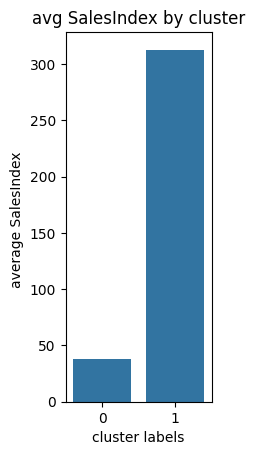

In [188]:
# average population
plt.subplot(1,3,2)
sns.barplot(x=cluster_analysis_Ikea_data.index, y = cluster_analysis_Ikea_data["SalesIndex"])
plt.title("avg SalesIndex by cluster")
plt.xlabel("cluster labels")
plt.ylabel("average SalesIndex ")

since cluster 1 has higher average values we are selecting cluster 1 for further analysis

In [189]:
data_final = data_ikea[data_ikea['cluster_labels'] == 1]
data_final.head()

,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,cluster_labels,has_IKEA
1,880,2010,Kalmar,3790,1621,62815,8716,0.138757,117.17365,390.516869,0,0,1,1
2,1780,2010,Karlstad,4560,1910,85753,13308,0.155190,119.64794,469.856708,0,0,1,1
7,123,2010,Järfälla,5119,2001,66211,9009,0.136065,128.20702,527.455371,0,0,1,0
9,126,2010,Huddinge,7153,2374,97453,12795,0.131294,151.00150,737.036192,0,0,1,0
16,160,2010,Täby,3441,1546,63789,13442,0.210726,111.54470,354.556345,0,0,1,0


In [190]:
data_final = data_final[data_final['has_IKEA'] == 0]

In [191]:
data_final.head()

,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,cluster_labels,has_IKEA
7,123,2010,Järfälla,5119,2001,66211,9009,0.136065,128.20702,527.455371,0,0,1,0
9,126,2010,Huddinge,7153,2374,97453,12795,0.131294,151.00150,737.036192,0,0,1,0
16,160,2010,Täby,3441,1546,63789,13442,0.210726,111.54470,354.556345,0,0,1,0
17,162,2010,Danderyd,500,272,31330,8448,0.269646,92.12444,51.519376,0,0,1,0
18,163,2010,Sollentuna,2393,1116,64630,12322,0.190654,107.46134,246.571733,0,0,1,0


In [192]:
# normalising the data for combined scoring

scaler = MinMaxScaler()
data_final[['Population', 'SalesIndex', 'Revenue']] = scaler.fit_transform(data_final[['Population', 'SalesIndex', 'Revenue']])

data_final.head()

,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,cluster_labels,has_IKEA
7,123,2010,Järfälla,0.694273,2001,0.353333,9009,0.136065,128.20702,0.694273,0,0,1,0
9,126,2010,Huddinge,1.000000,2374,0.669803,12795,0.131294,151.00150,1.000000,0,0,1,0
16,160,2010,Täby,0.442056,1546,0.328799,13442,0.210726,111.54470,0.442056,0,0,1,0
17,162,2010,Danderyd,0.000000,272,0.000000,8448,0.269646,92.12444,0.000000,0,0,1,0
18,163,2010,Sollentuna,0.284533,1116,0.337318,12322,0.190654,107.46134,0.284533,0,0,1,0


In [193]:
#add a new column combined_score

data_final['combined_score'] = data_final['Population'] + data_final['SalesIndex'] + data_final['Revenue']

data_final.head()

,Kommun_code,Year,Kommun_name,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border,cluster_labels,has_IKEA,combined_score
7,123,2010,Järfälla,0.694273,2001,0.353333,9009,0.136065,128.20702,0.694273,0,0,1,0,1.741879
9,126,2010,Huddinge,1.000000,2374,0.669803,12795,0.131294,151.00150,1.000000,0,0,1,0,2.669803
16,160,2010,Täby,0.442056,1546,0.328799,13442,0.210726,111.54470,0.442056,0,0,1,0,1.212911
17,162,2010,Danderyd,0.000000,272,0.000000,8448,0.269646,92.12444,0.000000,0,0,1,0,0.000000
18,163,2010,Sollentuna,0.284533,1116,0.337318,12322,0.190654,107.46134,0.284533,0,0,1,0,0.906384


In [194]:
# selecting the top three candidates

final_three = data_final.nlargest(3,'combined_score')
print("\n the top 3 candidates are")
print(final_three['Kommun_name'])


 the top 3 candidates are
9       Huddinge
53    Norrköping
7       Järfälla
Name: Kommun_name, dtype: object
